In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import thinkstats2
import thinkplot
import scipy.stats

In [2]:
happy = pd.read_csv('Downloads/world-happiness/2015.csv')

In [3]:
happy.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [5]:
## Calculating Descriptive Stats and Histograms for Variables 
print (happy['Happiness Score'].describe())

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64


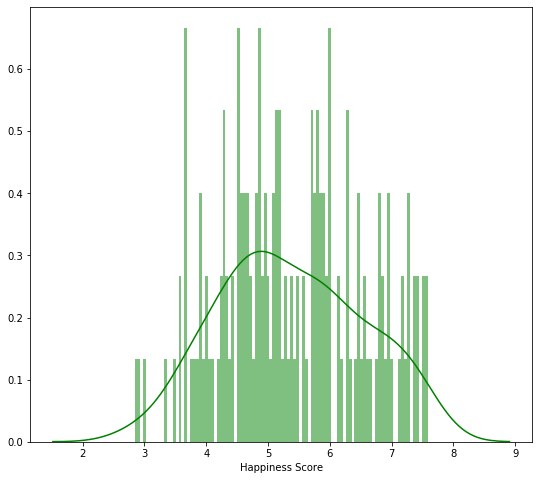

In [6]:
plt.figure (figsize = (9,8))
sns.distplot(happy['Happiness Score'], color = 'g', bins = 100, hist_kws = {'alpha': 0.5}) ; 

In [7]:
print (happy['Economy (GDP per Capita)'].describe())

count    158.000000
mean       0.846137
std        0.403121
min        0.000000
25%        0.545808
50%        0.910245
75%        1.158448
max        1.690420
Name: Economy (GDP per Capita), dtype: float64


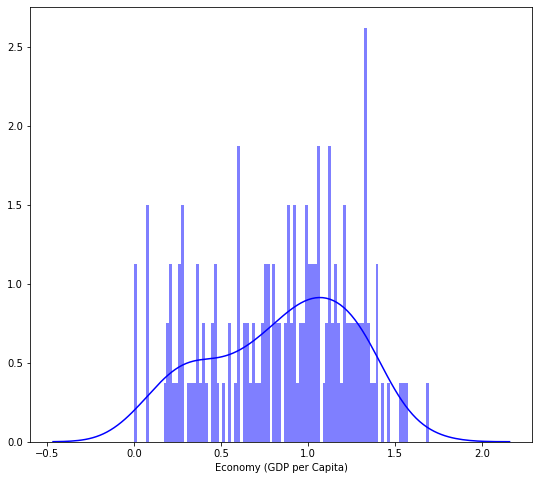

In [8]:
plt.figure (figsize = (9,8))
sns.distplot(happy['Economy (GDP per Capita)'], color = 'b', bins = 100, hist_kws = {'alpha': 0.5}) ;

In [9]:
print (happy['Health (Life Expectancy)'].describe())

count    158.000000
mean       0.630259
std        0.247078
min        0.000000
25%        0.439185
50%        0.696705
75%        0.811013
max        1.025250
Name: Health (Life Expectancy), dtype: float64


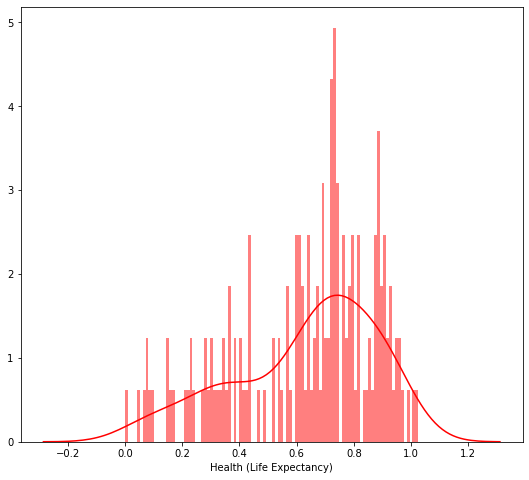

In [10]:
plt.figure (figsize = (9,8))
sns.distplot(happy['Health (Life Expectancy)'], color = 'r', bins = 100, hist_kws = {'alpha': 0.5}) ;

In [11]:
print (happy['Freedom'].describe())

count    158.000000
mean       0.428615
std        0.150693
min        0.000000
25%        0.328330
50%        0.435515
75%        0.549092
max        0.669730
Name: Freedom, dtype: float64


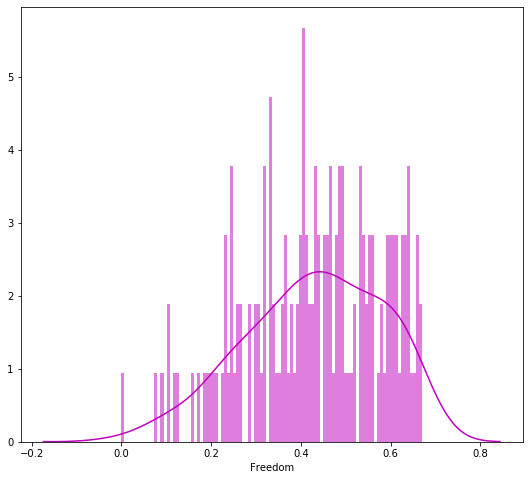

In [12]:
plt.figure (figsize = (9,8))
sns.distplot(happy['Freedom'], color = 'm', bins = 100, hist_kws = {'alpha': 0.5}) ;

In [13]:
print (happy['Trust (Government Corruption)'].describe())

count    158.000000
mean       0.143422
std        0.120034
min        0.000000
25%        0.061675
50%        0.107220
75%        0.180255
max        0.551910
Name: Trust (Government Corruption), dtype: float64


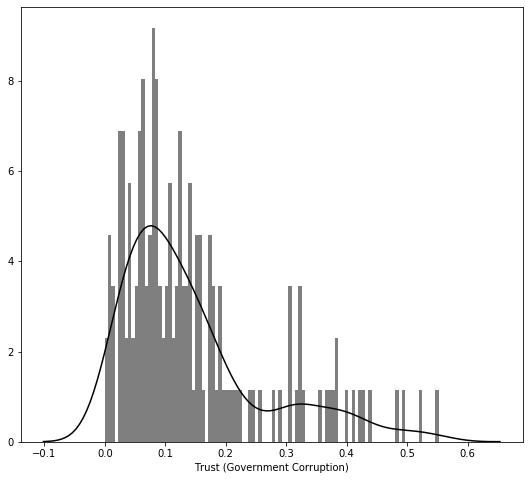

In [14]:
plt.figure (figsize = (9,8))
sns.distplot(happy['Trust (Government Corruption)'], color = 'k', bins = 100, hist_kws = {'alpha': 0.5}) ;

In [15]:
# only looking at the numeric variables of the dataset
list(set(happy.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [16]:
# creating a dataframe with only the numeric data
happy_num = happy.select_dtypes(include = ['float64', 'int64'])
happy_num.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [17]:
del happy_num['Standard Error'] # removing the standard error

In [18]:
del happy_num['Dystopia Residual'] #removing the dystopia residual

In [19]:
del happy_num['Happiness Rank'] # removing happiness rank from dataframe

In [20]:
happy_num.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


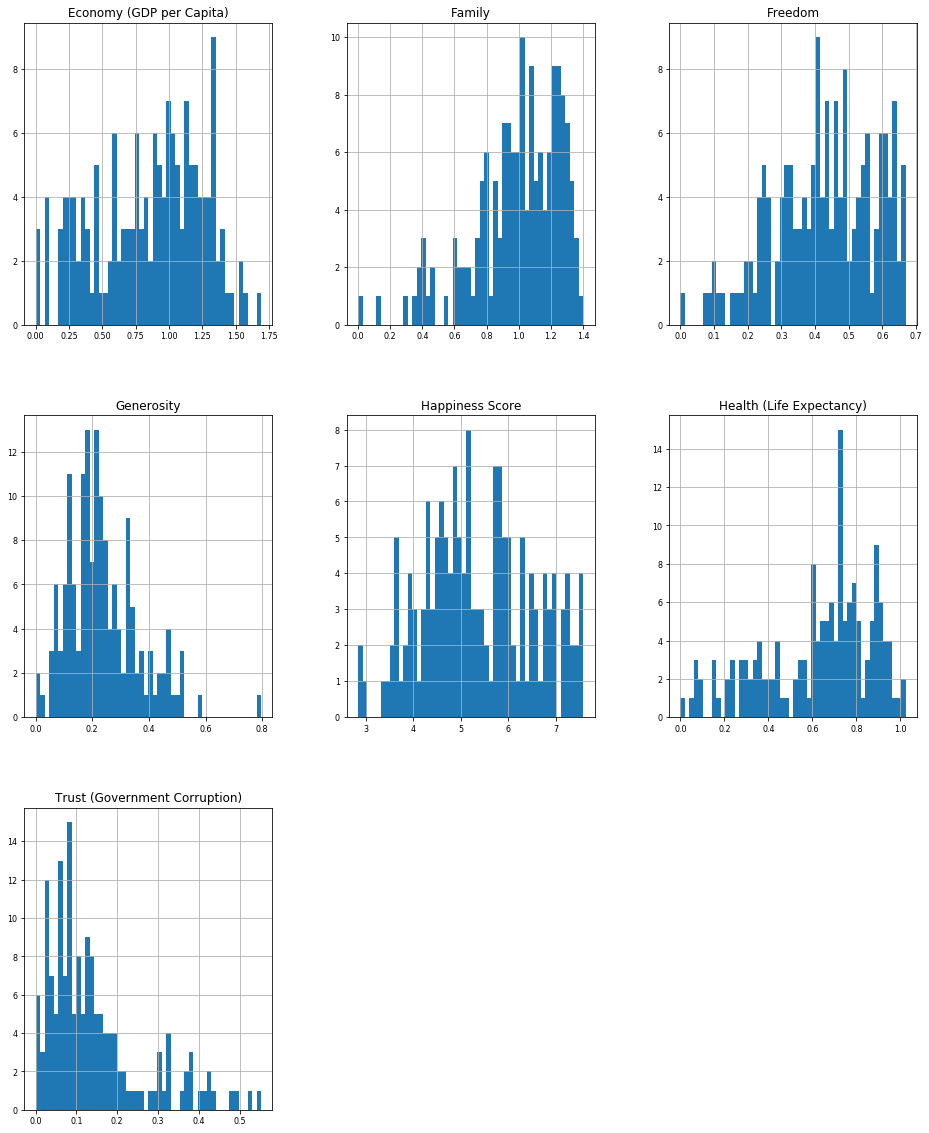

In [21]:
happy_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [22]:
happy_new = happy.rename(columns={'Happiness Rank': 'Happiness_Rank', 'Happiness Score': 'Happiness_Score', 'Health (Life Expectancy)': 'Health', 'Economy (GDP per Capita)': 'Economy', 'Trust (Government Corruption)': 'Trust'})

In [23]:
happy_new.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


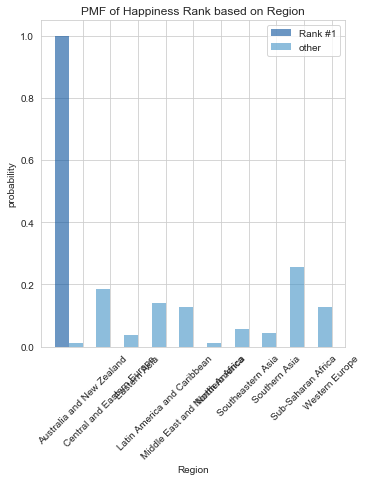

In [60]:
# PMF of Happiness Rank Based on Region
def MakeFigures(first, others):
    # plot the PMFs
    first_pmf = thinkstats2.Pmf(first.Region, label='Rank #1')
    others_pmf = thinkstats2.Pmf(others.Region, label='other')
    width = 0.5

    thinkplot.PrePlot(2, cols=2)
    thinkplot.Hist(first_pmf, align='right', width=width)
    thinkplot.Hist(others_pmf, align='left', width=width)
    thinkplot.Config(xlabel='Region',
                     ylabel='probability',
                     title = 'PMF of Happiness Rank based on Region')
    plt.xticks(rotation=45)
    
    
def main():
    first = happy_new[happy_new.Happiness_Rank == 1]
    others = happy_new[happy_new.Happiness_Rank != 1]
    MakeFigures(first, others)


if __name__ == '__main__':
    main()

(array([ 2.,  5.,  2.,  2.,  5.,  6.,  6.,  7.,  6.,  2.,  5., 12., 11.,
        13., 24., 14.,  5., 19.,  9.,  3.]),
 array([0.       , 0.0512625, 0.102525 , 0.1537875, 0.20505  , 0.2563125,
        0.307575 , 0.3588375, 0.4101   , 0.4613625, 0.512625 , 0.5638875,
        0.61515  , 0.6664125, 0.717675 , 0.7689375, 0.8202   , 0.8714625,
        0.922725 , 0.9739875, 1.02525  ]),
 <a list of 20 Patch objects>)

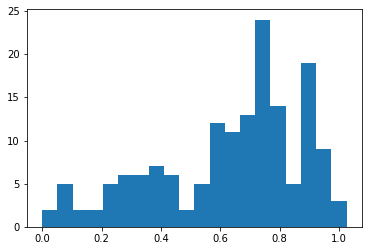

In [25]:
#PDF of Health
weights = happy_new['Health'].tolist()
plt.hist(weights, bins=20)

In [26]:
from numpy import mean,std
mean = mean(weights)
std = std(weights)
print(mean, std)

0.6302593670886076 0.24629463353565012


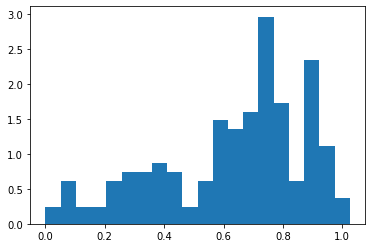

In [27]:
from scipy.stats import norm
distribution = norm(mean, std)

min_weight = min(weights)
max_weight = max(weights)
values = list(range(int(min_weight), int(max_weight)))

probabilities = [distribution.pdf(v) for v in values]

from matplotlib import pyplot
pyplot.hist(weights, bins=20, density=True) # , 
pyplot.plot(values, probabilities)

No handles with labels found to put in legend.


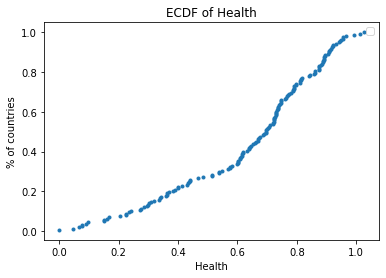

In [28]:
#Creating a CDF for Health

def ecdf(data):
    xaxis=np.sort(data)#sort the data
    yaxis=np.arange(1,len(data)+1)/len(data)#create percentages for y axis from 1% to 100%
    return xaxis, yaxis


xhealthy, yhealthy=ecdf(happy_new['Health'])
plt.plot(xhealthy, yhealthy, marker='.', linestyle='none')
plt.title('ECDF of Health')
plt.xlabel('Health')
plt.ylabel('% of countries')
plt.legend()
plt.show()




In [29]:
# Pareto Distribution of GDP based on Region

df =pd.DataFrame(happy_new, columns = ['Economy', 'Region'])
df.head()

,Economy,Region
0,1.39651,Western Europe
1,1.30232,Western Europe
2,1.32548,Western Europe
3,1.45900,Western Europe
4,1.32629,North America


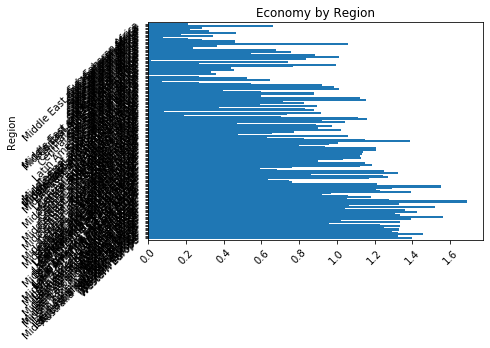

In [30]:
df.plot(kind='barh', x='Region', y='Economy', width=1.5, legend=None, title='Economy by Region')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [31]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20,20))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

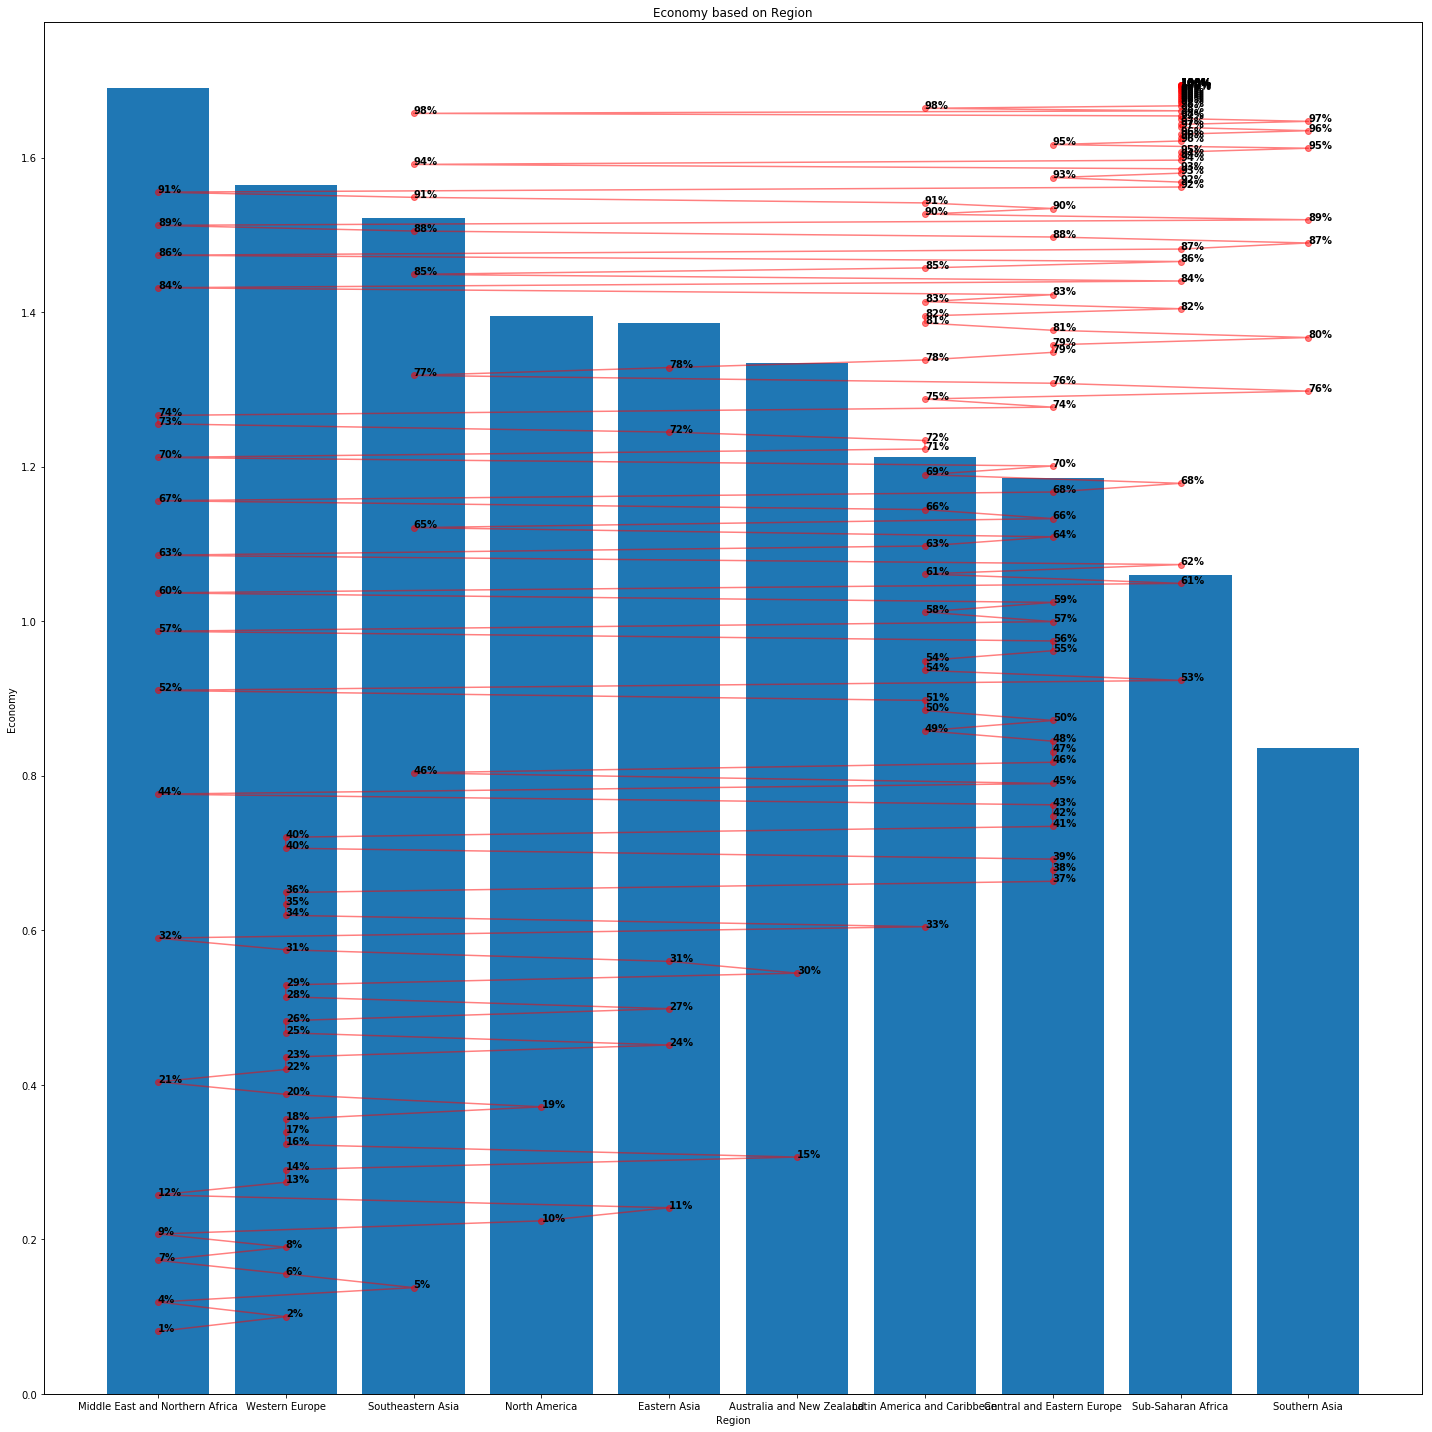

In [32]:
pareto_plot(df, x='Region', y='Economy', title='Economy based on Region')

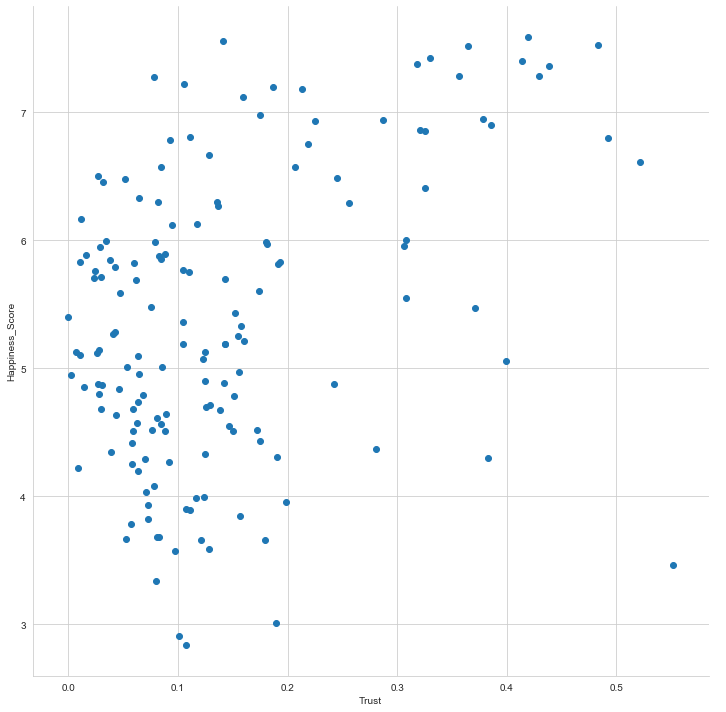

In [33]:
# Creating Scatterplots 

#Trust vs. Happiness Score

sns.set_style('whitegrid')
sns.FacetGrid(happy_new, height = 10) \
.map(plt.scatter, 'Trust', 'Happiness_Score') \
.add_legend()
plt.show()

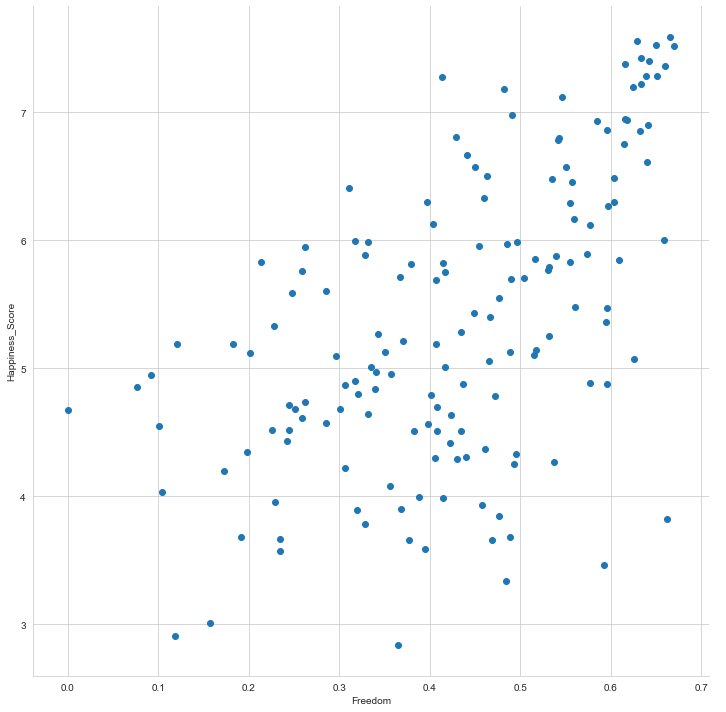

In [34]:
# Scatterplot of Freedom vs Happiness Score

sns.set_style('whitegrid')
sns.FacetGrid(happy_new, height = 10) \
.map(plt.scatter, 'Freedom', 'Happiness_Score') \
.add_legend()
plt.show()

In [73]:
# Examining which metrics are most correlated with Happiness Score

happy_new_corr = happy_new.corr()['Happiness_Score']
golden_features_list = happy_new_corr[abs(happy_new_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with Happiness Score:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with Happiness Score:
Happiness_Score      1.000000
Economy              0.780966
Family               0.740605
Health               0.724200
Freedom              0.568211
Dystopia Residual    0.530474
Trust                0.395199
Happiness_Rank      -0.992105
Name: Happiness_Score, dtype: float64


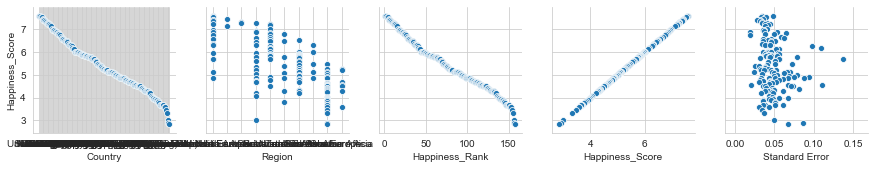

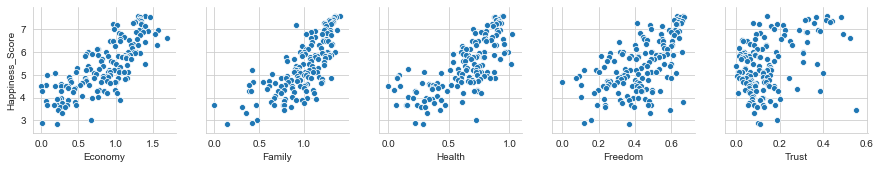

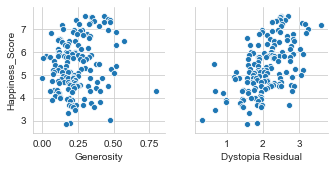

In [36]:
for i in range(0, len(happy_new.columns), 5):
    sns.pairplot(data=happy_new,
                x_vars=happy_new.columns[i:i+5],
                y_vars=['Happiness_Score'])

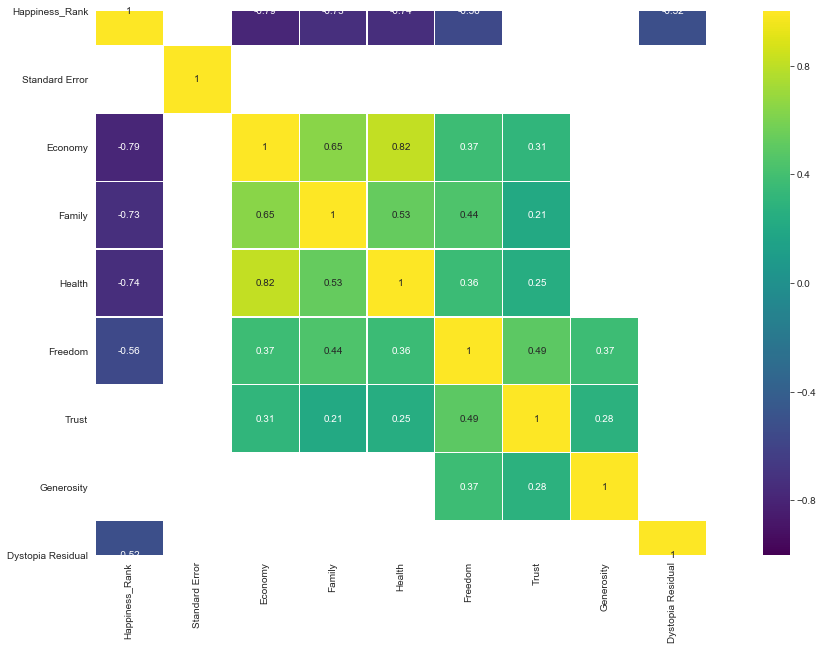

In [72]:
corr = happy_new.drop('Happiness_Score', axis=1).corr() # We already examined Happiness Score correlations
plt.figure(figsize=(20,10))

sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size":10},square=True);

In [76]:
## Calculating Covariances
happy_new.cov()

,Happiness_Rank,Happiness_Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
Happiness_Rank,2093.461743,-51.975613,0.124358,-14.483883,-9.142720,-8.316021,-3.839647,-2.044785,-0.928243,-13.220847
Happiness_Score,-51.975613,1.311048,-0.003480,0.360476,0.230969,0.204881,0.098042,0.054316,0.026156,0.336225
Standard Error,0.124358,-0.003480,0.000294,-0.001504,-0.000564,-0.001315,-0.000335,-0.000367,-0.000192,0.000797
Economy,-14.483883,0.360476,-0.001504,0.162506,0.070852,0.081323,0.022495,0.014898,-0.000534,0.008939
Family,-9.142720,0.230969,-0.000564,0.070852,0.074185,0.035741,0.018122,0.006722,0.003020,0.022332
Health,-8.316021,0.204881,-0.001315,0.081323,0.035741,0.061047,0.013422,0.007365,0.003391,0.002596
Freedom,-3.839647,0.098042,-0.000335,0.022495,0.018122,0.013422,0.022708,0.008927,0.007138,0.005237
Trust,-2.044785,0.054316,-0.000367,0.014898,0.006722,0.007365,0.008927,0.014408,0.004199,-0.002200
Generosity,-0.928243,0.026156,-0.000192,-0.000534,0.003020,0.003391,0.007138,0.004199,0.016049,-0.007104
Dystopia Residual,-13.220847,0.336225,0.000797,0.008939,0.022332,0.002596,0.005237,-0.002200,-0.007104,0.306417


In [38]:
#Chapter 9 Hypothesis Tests
# Chi Squared Test to look at relationship between Region and Country

#Creating Contingency Table
contingency_table=pd.crosstab(happy_new["Region"],happy_new["Country"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 Country                          Afghanistan  Albania  Algeria  Angola  \
Region                                                                   
Australia and New Zealand                  0        0        0       0   
Central and Eastern Europe                 0        1        0       0   
Eastern Asia                               0        0        0       0   
Latin America and Caribbean                0        0        0       0   
Middle East and Northern Africa            0        0        1       0   
North America                              0        0        0       0   
Southeastern Asia                          0        0        0       0   
Southern Asia                              1        0        0       0   
Sub-Saharan Africa                         0        0        0       1   
Western Europe                             0        0        0       0   

Country                          Argentina  Armenia  Australia  Austria  \
Region        

In [39]:
# Looking at Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]]


In [40]:
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[0.01265823 0.01265823 0.01265823 ... 0.01265823 0.01265823 0.01265823]
 [0.1835443  0.1835443  0.1835443  ... 0.1835443  0.1835443  0.1835443 ]
 [0.03797468 0.03797468 0.03797468 ... 0.03797468 0.03797468 0.03797468]
 ...
 [0.0443038  0.0443038  0.0443038  ... 0.0443038  0.0443038  0.0443038 ]
 [0.25316456 0.25316456 0.25316456 ... 0.25316456 0.25316456 0.25316456]
 [0.13291139 0.13291139 0.13291139 ... 0.13291139 0.13291139 0.13291139]]


In [41]:
# Calculating Degrees of Freedom
no_of_rows=len(contingency_table.iloc[0:10,0])
no_of_columns=len(contingency_table.iloc[0,0:158])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

Degree of Freedom:- 1413


In [42]:
#Significance Level 5%
alpha=0.05

In [43]:
# calculating the chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 26.019704433497537


In [44]:
# calculating the critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)

critical_value: 1501.562820860175


In [45]:
#calculating the p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

p-value: 1.0


In [46]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1413
chi-square statistic: 26.019704433497537
critical_value: 1501.562820860175
p-value: 1.0


In [47]:
# Compare the chi-square statistic to the critical value and p-value

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [48]:
## Multiple regression using Economy, Family, and Health to predict Happiness Score

X = happy_new[['Economy','Family', 'Health']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = happy_new['Happiness_Score']


In [49]:
from sklearn import linear_model
import statsmodels.api as sm

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 2.199125142436514
Coefficients: 
 [0.88808859 1.69694463 1.17953681]


In [50]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     137.0
Date:                Fri, 29 May 2020   Prob (F-statistic):           2.87e-43
Time:                        18:10:40   Log-Likelihood:                -142.39
No. Observations:                 158   AIC:                             292.8
Df Residuals:                     154   BIC:                             305.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1991      0.195     11.288      0.0

C:\Users\jfrui\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
## 2nd test of Model along with Plots

In [67]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [68]:
X = happy_new[['Economy','Family', 'Health']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = happy_new['Happiness_Score']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [70]:
model2 = linear_model.LinearRegression()
model2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

         Coefficient
Economy     0.960159
Family      1.777242
Health      1.060631
     Actual  Predicted
7     7.364   6.668188
44    5.995   6.348727
113   4.633   4.289652
120   4.514   4.617708
63    5.716   6.131575
122   4.507   4.148059
121   4.512   3.856401
139   3.956   4.156025
109   4.686   4.809085
92    5.007   5.575770


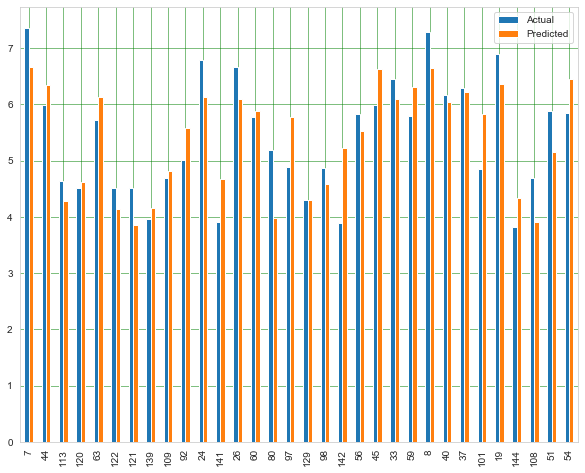

Y-Intercept: 
 2.1324486479126206
Root Mean Square Error(rmsd) 
 0.6040744786477084
R^2 Value: 
 0.643134087447141


In [71]:
coeff_df = pd.DataFrame(model2.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = model2.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      # Lower the rmse(rmsd) is, the better the fit
r2_value = r2_score(Y_test, y_pred)                     # The closer towards 1, the better the fit

print("Y-Intercept: \n", model2.intercept_)
print("Root Mean Square Error(rmsd) \n", rmsd)
print("R^2 Value: \n", r2_value)

In [ ]:
## Calculating modes for 5 variables of interest

In [51]:
happy.loc[:,"Happiness Score"].mode()

0    5.192
dtype: float64

In [52]:
happy_new.loc[:,"Economy"].mode()

0      0.00000
1      0.01530
2      0.01604
3      0.06940
4      0.07120
        ...   
153    1.45900
154    1.52186
155    1.55422
156    1.56391
157    1.69042
Length: 158, dtype: float64

In [53]:
happy_new.loc[:,"Freedom"].mode()

0      0.00000
1      0.07699
2      0.09245
3      0.10081
4      0.10384
        ...   
153    0.65821
154    0.65980
155    0.66246
156    0.66557
157    0.66973
Length: 158, dtype: float64

In [54]:
happy_new.loc[:,"Health"].mode()

0    0.92356
dtype: float64

In [55]:
happy_new.loc[:,"Trust"].mode()

0    0.32524
dtype: float64